# 3. German dataset (Scarlett)

In [1]:
!pip install themis-ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
from themis_ml.datasets import german_credit
credit = german_credit(raw=True)
credit.head(2)
credit

,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account/bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors/guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,credit_risk
0,1,6,critical_account/other_credits_existing_not_at...,radio/television,1169,0,4,4,male_single,none,...,real_estate,67,none,own,2,2,1,1,1,1
1,2,48,existing_credits_paid_back_duly_till_now,radio/television,5951,1,2,2,female_divorced/separated/married,none,...,real_estate,22,none,own,1,2,1,0,1,0
2,0,12,critical_account/other_credits_existing_not_at...,education,2096,1,3,2,male_single,none,...,real_estate,49,none,own,1,1,2,0,1,1
3,1,42,existing_credits_paid_back_duly_till_now,furniture/equipment,7882,1,3,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45,none,for free,1,2,2,0,1,1
4,1,24,delay_in_paying_off_in_the_past,car_(new),4870,1,2,3,male_single,none,...,unknown/no_property,53,none,for free,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,existing_credits_paid_back_duly_till_now,furniture/equipment,1736,1,3,3,female_divorced/separated/married,none,...,real_estate,31,none,own,1,1,1,0,1,1
996,1,30,existing_credits_paid_back_duly_till_now,car_(used),3857,1,2,4,male_divorced/separated,none,...,building_society_savings_agreement/life_insurance,40,none,own,1,3,1,1,1,1
997,0,12,existing_credits_paid_back_duly_till_now,radio/television,804,1,4,4,male_single,none,...,car_or_other,38,none,own,1,2,1,0,1,1
998,1,45,existing_credits_paid_back_duly_till_now,radio/television,1845,1,2,4,male_single,none,...,unknown/no_property,23,none,for free,1,2,1,1,1,0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
status_of_existing_checking_account                         1000 non-null int64
duration_in_month                                           1000 non-null int64
credit_history                                              1000 non-null object
purpose                                                     1000 non-null object
credit_amount                                               1000 non-null int64
savings_account/bonds                                       1000 non-null int64
present_employment_since                                    1000 non-null int64
installment_rate_in_percentage_of_disposable_income         1000 non-null int64
personal_status_and_sex                                     1000 non-null object
other_debtors/guarantors                                    1000 non-null object
present_residence_since                                     1000 non-null int64
property  

* Account_status: factor, status of existing checking account

* Duration: numeric, loan duration in month

* Credit_history: factor, previous credit history

* Purpose: factor, loan purpose

* Amount: numeric, credit amount

* Savings: factor, savings account/bonds

* Employment: factor, present employment since

* Installment_rate: numeric, installment rate in percentage of disposable income

* Guarantors: factor, other debtors / guarantors

* Resident_since: factor, present residence since

* Property: factor, property

* Age: numeric, age in years

* Other_plans: factor, other installment plans

* Housing: factor, housing

* Num_credits: numeric, Number of existing credits at this bank

* Job: factor, job

* People_maintenance: numeric, number of people being liable to provide maintenance for

* Phone: factor, telephone

* Foreign: factor, foreign worker

* BAD: factor, GOOD/BAD for whether a customer has defaulted on a loan. This is the outcome or target in this dataset

* Female: factor, female/male for gender

* probability: numeric, predicted probabilities for default, ranges from 0 to 1

* predicted: numeric, predicted values for default, 0/1 for no/yes

## 3.1 Literature Review

The German Credit data set is a publically available data set downloaded from the UCI Machine Learning Repository

Popular fairness metrics: 
* demographic parity
* equal opportunity
* equalized odds

Protected attributes: 

* Gender(male: privileged; female: unprivileged);

* Age(> 25: privileged; < 25 : unpreviledged)

* Nationality(non-foreigners: privileged; foreigners: unpreviledged)

## 3.2 Binary Classification Pipeline - Logistics Regression

In [4]:
def preprocessGermanCredit(temp_df):
    df = temp_df.copy()
    df = df[['credit_risk', 'duration_in_month', 'credit_amount', 'installment_rate_in_percentage_of_disposable_income', 'age_in_years', 'credit_history', 'purpose', 'housing']]
    
    # scale
    scaler = MinMaxScaler()
    numerical_features = ['duration_in_month', 'credit_amount', 'installment_rate_in_percentage_of_disposable_income', 'age_in_years']
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    categorical_features = ['credit_history', 'purpose', 'housing']
    df = pd.get_dummies(data=df, columns=categorical_features)

    # split data into training and testing
    x, y = df.drop("credit_risk", axis=1), df["credit_risk"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    return x_train, x_test, y_train, y_test

In [5]:
x_train, x_test, y_train, y_test = preprocessGermanCredit(credit)

(700, 22)
(300, 22)
(700,)
(300,)


In [6]:
def logisticRegression(x_train, y_train, x_test):
    from sklearn.linear_model import LogisticRegression

    logisticRegr = LogisticRegression(solver='lbfgs', max_iter=500)
    logisticRegr.fit(x_train, y_train)

    predictions = logisticRegr.predict(x_test)
    return predictions

In [7]:
credit['personal_status_and_sex'].value_counts()

male_single                          548
female_divorced/separated/married    310
male_married/widowed                  92
male_divorced/separated               50
Name: personal_status_and_sex, dtype: int64

In [8]:
def predictionSummaryGender(x, y_real, y_predict, df):
    [[tn , fp],[fn , tp]]  = confusion_matrix(y_real, y_predict)
    overall = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (overall): ", tp/(tp+fn))
    print("False positive rate (overall): ", fp/(fp+tn))
    print("True negative rate (overall): ", tn/(tn+fp))
    print("False negative rate (overall): ", fn/(fn+tp))
    print("Positive predictive value (overall): ", tp/(tp+fp),"\n")

    x['Predicted Creditability'] = y_predict
    x['Real Creditability'] = y_real
    x_male = x[(df['personal_status_and_sex'] == 'male_married/widowed') | 
               (df['personal_status_and_sex'] == 'male_single ') |
               (df['personal_status_and_sex'] == 'male_divorced/separated')].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_male['Real Creditability'], x_male['Predicted Creditability'])
    male = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (male): ", tp/(tp+fn))
    print("False positive rate (male): ", fp/(fp+tn))
    print("True negative rate (male): ", tn/(tn+fp))
    print("False negative rate (male): ", fn/(fn+tp))
    print("Positive predictive value (male): ", tp/(tp+fp),"\n")

    x_female = x[df['personal_status_and_sex'] == 'female_divorced/separated/married'].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_female['Real Creditability'], x_female['Predicted Creditability'])
    female = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (female): ", tp/(tp+fn))
    print("False positive rate (female): ", fp/(fp+tn))
    print("True negative rate (female): ", tn/(tn+fp))
    print("False negative rate (female): ", fn/(fn+tp))
    print("Positive predictive value (female): ", tp/(tp+fp),"\n")

    metrics = ["FPR","FNR","TPR","TNR","PPV"]
    bar_width = 0.3
    index_overall = np.arange(len(metrics))
    index_male = index_overall + bar_width
    index_female = index_male + bar_width

    # Calculate the difference in TPR (Equalized Opportunity distance)
    print("TPR_diff (Equalized Opportunity distance): ", abs(female[2]-male[2]))
    # Calculate the difference in FPR (second Equalized Odds distance)
    print("FPR_diff (Equalized Odds): ", abs(female[0]-male[0]))
    # Calculate the difference in TP+FP (demographic parity)
    print("FPR_diff (Demographic Parity): ", abs(female[0]+female[2]-male[0]-male[2]))

    plt.bar(index_overall,height=overall,width=bar_width,label="overall")
    plt.bar(index_male,height=male,width=bar_width,label="male")
    plt.bar(index_female,height=female,width=bar_width,label="female")
    plt.xticks(index_overall+bar_width/2,metrics)
    plt.legend()

    return

In [9]:
credit['foreign_worker'].value_counts()

1    963
0     37
Name: foreign_worker, dtype: int64

In [10]:
def predictionSummaryForeigner(x, y_real, y_predict, df):
    [[tn , fp],[fn , tp]]  = confusion_matrix(y_real, y_predict)
    overall = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (overall): ", tp/(tp+fn))
    print("False positive rate (overall): ", fp/(fp+tn))
    print("True negative rate (overall): ", tn/(tn+fp))
    print("False negative rate (overall): ", fn/(fn+tp))
    print("Positive predictive value (overall): ", tp/(tp+fp),"\n")

    x['Predicted Creditability'] = y_predict
    x['Real Creditability'] = y_real
    x_foreigner = x[df['foreign_worker'] == 1].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_foreigner['Real Creditability'], x_foreigner['Predicted Creditability'])
    foreigner = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (foreigner): ", tp/(tp+fn))
    print("False positive rate (foreigner): ", fp/(fp+tn))
    print("True negative rate (foreigner): ", tn/(tn+fp))
    print("False negative rate (foreigner): ", fn/(fn+tp))
    print("Positive predictive value (foreigner): ", tp/(tp+fp),"\n")

    x_non_foreigner = x[df['foreign_worker'] == 0].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_non_foreigner['Real Creditability'], x_non_foreigner['Predicted Creditability'])
    non_foreigner = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (non_foreigner): ", tp/(tp+fn))
    print("False positive rate (non_foreigner): ", fp/(fp+tn))
    print("True negative rate (non_foreigner): ", tn/(tn+fp))
    print("False negative rate (non_foreigner): ", fn/(fn+tp))
    print("Positive predictive value (non_foreigner): ", tp/(tp+fp),"\n")

    # Calculate the difference in TPR (Equalized Opportunity distance)
    print("TPR_diff (Equalized Opportunity distance): ", abs(foreigner[2]-non_foreigner[2]))
    # Calculate the difference in FPR (second Equalized Odds distance)
    print("FPR_diff (Equalized Odds): ", abs(foreigner[0]-non_foreigner[0]))
    # Calculate the difference in TP+FP (demographic parity)
    print("FPR_diff (Demographic Parity): ", abs(foreigner[0]+foreigner[2]-non_foreigner[0]-non_foreigner[2]))

    metrics = ["FPR","FNR","TPR","TNR","PPV"]
    bar_width = 0.3
    index_overall = np.arange(len(metrics))
    index_foreigner = index_overall + bar_width
    index_non_foreigner = index_foreigner + bar_width

    plt.bar(index_overall,height=overall,width=bar_width,label="overall")
    plt.bar(index_foreigner,height=foreigner,width=bar_width,label="foreigner")
    plt.bar(index_non_foreigner,height=non_foreigner,width=bar_width,label="non_foreigner")
    plt.xticks(index_overall+bar_width/2,metrics)
    plt.legend()

    return

In [11]:
def predictionSummaryAge(x, y_real, y_predict, df):
    [[tn , fp],[fn , tp]]  = confusion_matrix(y_real, y_predict)
    overall = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (overall): ", tp/(tp+fn))
    print("False positive rate (overall): ", fp/(fp+tn))
    print("True negative rate (overall): ", tn/(tn+fp))
    print("False negative rate (overall): ", fn/(fn+tp))
    print("Positive predictive value (overall): ", tp/(tp+fp),"\n")

    x['Predicted Creditability'] = y_predict
    x['Real Creditability'] = y_real
    x_young = x[df['age_in_years'] < 25].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_young['Real Creditability'], x_young['Predicted Creditability'])
    young = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (young): ", tp/(tp+fn))
    print("False positive rate (young): ", fp/(fp+tn))
    print("True negative rate (young): ", tn/(tn+fp))
    print("False negative rate (young): ", fn/(fn+tp))
    print("Positive predictive value (young): ", tp/(tp+fp),"\n")

    x_senior = x[df['age_in_years'] >= 25].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_senior['Real Creditability'], x_senior['Predicted Creditability'])
    senior = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (senior): ", tp/(tp+fn))
    print("False positive rate (senior): ", fp/(fp+tn))
    print("True negative rate (senior): ", tn/(tn+fp))
    print("False negative rate (senior): ", fn/(fn+tp))
    print("Positive predictive value (senior): ", tp/(tp+fp),"\n")

    # Calculate the difference in TPR (Equalized Opportunity distance)
    print("TPR_diff (Equalized Opportunity distance): ", abs(young[2]-senior[2]))
    # Calculate the difference in FPR (second Equalized Odds distance)
    print("FPR_diff (Equalized Odds): ", abs(young[0]-senior[0]))
    # Calculate the difference in TP+FP (demographic parity)
    print("FPR_diff (Demographic Parity): ", abs(young[0]+young[2]-senior[0]-senior[2]))

    metrics = ["FPR","FNR","TPR","TNR","PPV"]
    bar_width = 0.3
    index_overall = np.arange(len(metrics))
    index_young = index_overall + bar_width
    index_senior = index_young + bar_width

    plt.bar(index_overall,height=overall,width=bar_width,label="overall")
    plt.bar(index_young,height=young,width=bar_width,label="young")
    plt.bar(index_senior,height=senior,width=bar_width,label="senior")
    plt.xticks(index_overall+bar_width/2,metrics)
    plt.legend()

    return

In [12]:
# predictions of testing data
predictions = logisticRegression(x_train, y_train, x_test)

True positive rate (overall):  0.8878504672897196
False positive rate (overall):  0.7209302325581395
True negative rate (overall):  0.27906976744186046
False negative rate (overall):  0.11214953271028037
Positive predictive value (overall):  0.753968253968254 

True positive rate (male):  0.9090909090909091
False positive rate (male):  0.8181818181818182
True negative rate (male):  0.18181818181818182
False negative rate (male):  0.09090909090909091
Positive predictive value (male):  0.6896551724137931 

True positive rate (female):  0.9230769230769231
False positive rate (female):  0.7692307692307693
True negative rate (female):  0.23076923076923078
False negative rate (female):  0.07692307692307693
Positive predictive value (female):  0.6666666666666666 

TPR_diff (Equalized Opportunity distance):  0.013986013986014068
FPR_diff (Equalized Odds):  0.04895104895104896
FPR_diff (Demographic Parity):  0.03496503496503478
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykerne

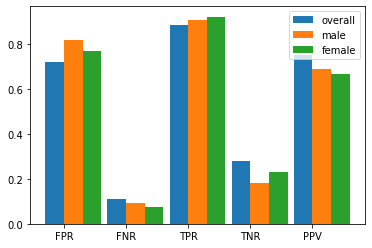

In [13]:
predictionSummaryGender(x_test, y_test, predictions, credit)

True positive rate (overall):  0.8878504672897196
False positive rate (overall):  0.7209302325581395
True negative rate (overall):  0.27906976744186046
False negative rate (overall):  0.11214953271028037
Positive predictive value (overall):  0.753968253968254 

True positive rate (foreigner):  0.8866995073891626
False positive rate (foreigner):  0.7176470588235294
True negative rate (foreigner):  0.2823529411764706
False negative rate (foreigner):  0.11330049261083744
Positive predictive value (foreigner):  0.7468879668049793 

True positive rate (non_foreigner):  0.9090909090909091
False positive rate (non_foreigner):  1.0
True negative rate (non_foreigner):  0.0
False negative rate (non_foreigner):  0.09090909090909091
Positive predictive value (non_foreigner):  0.9090909090909091 

TPR_diff (Equalized Opportunity distance):  0.02239140170174647
FPR_diff (Equalized Odds):  0.2823529411764706
FPR_diff (Demographic Parity):  0.30474434287821717
/shared-libs/python3.7/py-core/lib/python

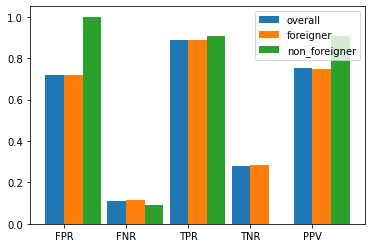

In [14]:
predictionSummaryForeigner(x_test, y_test, predictions, credit)

True positive rate (overall):  0.8878504672897196
False positive rate (overall):  0.7209302325581395
True negative rate (overall):  0.27906976744186046
False negative rate (overall):  0.11214953271028037
Positive predictive value (overall):  0.753968253968254 

True positive rate (young):  0.96
False positive rate (young):  0.7368421052631579
True negative rate (young):  0.2631578947368421
False negative rate (young):  0.04
Positive predictive value (young):  0.631578947368421 

True positive rate (senior):  0.8783068783068783
False positive rate (senior):  0.7164179104477612
True negative rate (senior):  0.2835820895522388
False negative rate (senior):  0.12169312169312169
Positive predictive value (senior):  0.7757009345794392 

TPR_diff (Equalized Opportunity distance):  0.0816931216931217
FPR_diff (Equalized Odds):  0.0204241948153967
FPR_diff (Demographic Parity):  0.10211731650851852
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

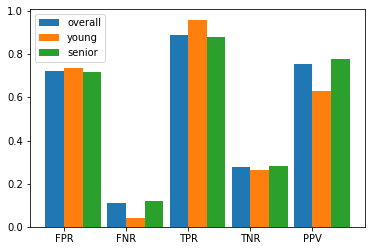

In [15]:
predictionSummaryAge(x_test, y_test, predictions, credit)

True positive rate (overall):  0.9197530864197531
False positive rate (overall):  0.677570093457944
True negative rate (overall):  0.32242990654205606
False negative rate (overall):  0.08024691358024691
Positive predictive value (overall):  0.7550675675675675 

True positive rate (male):  0.9466666666666667
False positive rate (male):  0.8529411764705882
True negative rate (male):  0.14705882352941177
False negative rate (male):  0.05333333333333334
Positive predictive value (male):  0.71 

True positive rate (female):  0.9117647058823529
False positive rate (female):  0.6142857142857143
True negative rate (female):  0.38571428571428573
False negative rate (female):  0.08823529411764706
Positive predictive value (female):  0.7425149700598802 

TPR_diff (Equalized Opportunity distance):  0.034901960784313735
FPR_diff (Equalized Odds):  0.23865546218487388
FPR_diff (Demographic Parity):  0.2735574229691877
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1

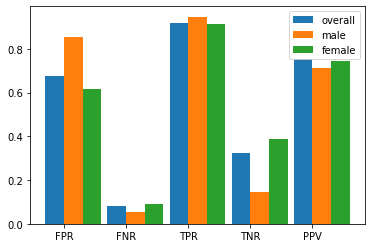

In [16]:
# predictions of training data
predictions = logisticRegression(x_train, y_train, x_train)
predictionSummaryGender(x_train, y_train, predictions, credit)

True positive rate (overall):  0.9197530864197531
False positive rate (overall):  0.677570093457944
True negative rate (overall):  0.32242990654205606
False negative rate (overall):  0.08024691358024691
Positive predictive value (overall):  0.7550675675675675 

True positive rate (foreigner):  0.915948275862069
False positive rate (foreigner):  0.6777251184834123
True negative rate (foreigner):  0.3222748815165877
False negative rate (foreigner):  0.08405172413793104
Positive predictive value (foreigner):  0.7482394366197183 

True positive rate (non_foreigner):  1.0
False positive rate (non_foreigner):  0.6666666666666666
True negative rate (non_foreigner):  0.3333333333333333
False negative rate (non_foreigner):  0.0
Positive predictive value (non_foreigner):  0.9166666666666666 

TPR_diff (Equalized Opportunity distance):  0.08405172413793105
FPR_diff (Equalized Odds):  0.011058451816745696
FPR_diff (Demographic Parity):  0.07299327232118535
/shared-libs/python3.7/py-core/lib/python

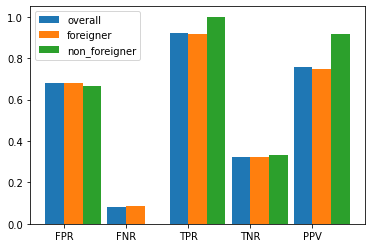

In [17]:
predictionSummaryForeigner(x_train, y_train, predictions, credit)

True positive rate (overall):  0.9197530864197531
False positive rate (overall):  0.677570093457944
True negative rate (overall):  0.32242990654205606
False negative rate (overall):  0.08024691358024691
Positive predictive value (overall):  0.7550675675675675 

True positive rate (young):  0.8253968253968254
False positive rate (young):  0.5952380952380952
True negative rate (young):  0.40476190476190477
False negative rate (young):  0.1746031746031746
Positive predictive value (young):  0.6753246753246753 

True positive rate (senior):  0.933806146572104
False positive rate (senior):  0.6976744186046512
True negative rate (senior):  0.3023255813953488
False negative rate (senior):  0.06619385342789598
Positive predictive value (senior):  0.7669902912621359 

TPR_diff (Equalized Opportunity distance):  0.10840932117527868
FPR_diff (Equalized Odds):  0.10243632336655595
FPR_diff (Demographic Parity):  0.21084564454183474
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykern

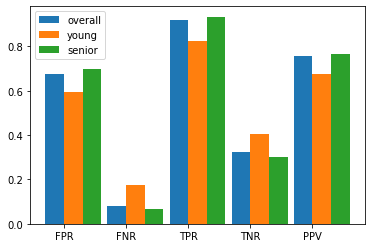

In [18]:
predictionSummaryAge(x_train, y_train, predictions, credit)

## 3.3 Hypothesis Test Pipeline

In [19]:
from scipy.stats import ttest_ind
def hypothesisTest(credit):

    # H0: null hypothesis: the mean of the credit risk of people with age lower then 25 = the mean of the  credit risk of people with age high then 25
    # H1: alternate hypothesis: the mean of the credit risk of people with age lower then 25 > the mean of the  credit risk of people with age high then 25
    
    young = credit[credit['age_in_years'] <25].copy()
    old = credit[credit['age_in_years'] >=25].copy()
    young_credit_risk =  young['credit_risk']
    old_credit_risk = old['credit_risk']

    stat, p = ttest_ind(old_credit_risk, young_credit_risk)
    print('first:')
    print('stat=%.3f, p=%.27f' % (stat, p))

    if p > 0.05:
        print('we are accepting null hypothesis, Probably the same distribution')
    else:
        print('we are rejecting null hypothesis, Probably different distributions')
    
    # so the result shows us the the mean rate are not the same 
    # Tests whether the means of two independent samples are significantly different.







    # H0: null hypothesis: the mean of the credit risk of people with age lower then 25 = the mean of the  credit risk of people with age high then 25
    # H1: alternate hypothesis: the mean of the credit risk of people with age lower then 25 > the mean of the  credit risk of people with age high then 25
    
    x_male = credit[(credit['personal_status_and_sex'] == 'male_single ')].copy()
        # (credit['personal_status_and_sex'] == 'male_married/widowed')| 
        #        (credit['personal_status_and_sex'] == 'male_single ') |
        #        (credit['personal_status_and_sex'] == 'male_divorced/separated')].copy()
    x_female = credit[credit['personal_status_and_sex'] == 'female_divorced/separated/married'].copy()

    female_credit_risk =  x_female['credit_risk']
    male_credit_risk = x_male['credit_risk']

    stat, p = ttest_ind(female_credit_risk, male_credit_risk)
    print('first:')
    print('stat=%.3f, p=%.27f' % (stat, p))

    if p > 0.05:
        print('we are accepting null hypothesis, Probably the same distribution')
    else:
        print('we are rejecting null hypothesis, Probably different distributions')
    
    # so the result shows us the the mean rate are not the same 
    # Tests whether the means of two independent samples are significantly different.








    # H0: null hypothesis: the mean of the credit risk of foreign worker = the mean of the  credit risk of non-foreigner
    # H1: alternate hypothesis: the mean of the credit risk of foreign worker < the mean of the  credit risk of non-foreigner

    
    non_foreign  = credit[credit['foreign_worker'] == 1].copy()

    foreigner = credit[credit['foreign_worker'] == 0].copy()

    foreign_credit_risk =  foreigner['credit_risk']
    non_foreigner_credit_risk = non_foreign['credit_risk']

    stat, p = ttest_ind(foreign_credit_risk, non_foreigner_credit_risk)
    print('first:')
    print('stat=%.3f, p=%.27f' % (stat, p))

    if p > 0.05:
        print('we are accepting null hypothesis, Probably the same distribution')
    else:
        print('we are rejecting null hypothesis, Probably different distributions')
    
    # so the result shows us the the mean rate are not the same 
    # Tests whether the means of two independent samples are significantly different.

hypothesisTest(credit)


first:
stat=3.171, p=0.001562879701362014997489958
we are rejecting null hypothesis, Probably different distributions
first:
stat=nan, p=nan
we are rejecting null hypothesis, Probably different distributions
first:
stat=2.602, p=0.009411920075301638891063227
we are rejecting null hypothesis, Probably different distributions


The above Hypothesis Testing corresponding with the following protected attributes:

Gender(male: privileged; female: unprivileged);

Age(> 25: privileged; < 25 : unpreviledged)

Nationality(non-foreigners: privileged; foreigners: unpreviledged)

## 3.4 References

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa928c63-0856-4021-a156-02d09e35182a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>